<a href="https://colab.research.google.com/github/MustafizSaadi/DMLab/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import gzip
from io import StringIO
import re
import sys
import math
import random
import statistics 
import pandas as pd
from scipy import stats
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# cd /content/drive/My\ Drive

In [ ]:
def load_dataset(file_name, threshold):
  attribute_dictionary = dict()
  max_dictionary = dict()
  min_dictionary = dict()
  category_values = dict()
  df = pd.read_csv(file_name, header = None)

  df = df.astype("float32")
  print(df.dtypes)

  full_table = df.to_numpy()
  # full_table = round(full_table,2)
  print(full_table)

  for i in range(full_table.shape[1]):
    print(full_table[:,i])
    elements = np.unique(full_table[:,i])
    ratio =  len(elements)/full_table.shape[0]

    if ratio >= threshold:
      attribute_dictionary[i] = "numeric"
      max_dictionary[i] = max(elements)
      min_dictionary[i] = min(elements)
    else:
      attribute_dictionary[i] = "category"
      category_values[i] = elements
  
  print(attribute_dictionary)
  # print(max_dictionary)
  # print(min_dictionary)
  return attribute_dictionary, max_dictionary, min_dictionary, category_values, full_table

In [ ]:
def replace_nan_with_most_frequent_category(df, column):
  most_frequent_category = df.iloc[:,column].mode()[0]
  print(most_frequent_category)
  df.iloc[:,column].fillna(most_frequent_category, inplace = True)
  print(df.iloc[:,column])
  print("within replace")
  return df

In [ ]:
def load_dataset_hcv(file_name, threshold):
  attribute_dictionary = dict()
  max_dictionary = dict()
  min_dictionary = dict()
  category_values = dict()
  df = pd.read_csv(file_name, header = None)
  
  df = df.drop([0])
  df = df.drop(df.columns[0], axis = 1)
  df = df.drop(df.columns[0], axis = 1)
  df = df.replace('NA', np.nan)
  df = df.replace('m', 0)
  df = df.replace('f', 1)
  df = df.astype("float32")
  print("dataframe type", df.dtypes)
  print(df)
  
  for i in range(df.shape[1]):
    if df.iloc[:,i].isnull().values.any():
      print(1)
      df = replace_nan_with_most_frequent_category(df, i)
    # print(df.columns[i])

  print(df.shape)
  full_table = df.to_numpy()
  print(full_table.shape[1])

  for i in range(full_table.shape[1]):
    elements = np.unique(full_table[:,i])
    ratio =  len(elements)/full_table.shape[0]

    if ratio >= threshold:
      attribute_dictionary[i] = "numeric"
      max_dictionary[i] = max(elements)
      min_dictionary[i] = min(elements)
      # full_table[:,i] = np.round(full_table[:,i].astype("float32"), 2)
    else:
      attribute_dictionary[i] = "category"
      category_values[i] = elements
      # full_table[:,i] = full_table[:,i].astype("str")
    print(full_table[:,i])
  
  print(attribute_dictionary)
  
  return attribute_dictionary, max_dictionary, min_dictionary, category_values, full_table

In [ ]:
def load_dataset_sponge(file_name, threshold):
  attribute_dictionary = dict()
  max_dictionary = dict()
  min_dictionary = dict()
  category_values = dict()
  df = pd.read_csv(file_name, header = None)
  
  df = df.drop(df.columns[0], axis = 1)
  df = df.replace('?', np.nan)
  df = df.astype("object")
  print("dataframe type", df.dtypes)
  print("start")
  
  for i in range(df.shape[1]):
    if df.iloc[:,i].isnull().values.any():
      print(1)
      df = replace_nan_with_most_frequent_category(df, i)
    # print(df.columns[i])

  print(df.shape)
  full_table = df.to_numpy()
  print(full_table.shape[1])

  for i in range(full_table.shape[1]):
    print(full_table[:,i])
    elements = np.unique(full_table[:,i])
    ratio =  len(elements)/full_table.shape[0]

    if ratio >= threshold:
      attribute_dictionary[i] = "numeric"
      max_dictionary[i] = max(elements)
      min_dictionary[i] = min(elements)
    else:
      attribute_dictionary[i] = "category"
      category_values[i] = elements
  
  print(attribute_dictionary)
  
  return attribute_dictionary, max_dictionary, min_dictionary, category_values, full_table

In [ ]:
def distance(attribute_dictionary, max_dictionary, min_dictionary, data, mean):
  # print(data)
  # print(mean)
  dist = 0
  col = 0
  for i,j in zip(data, mean):
    if attribute_dictionary[col] == "numeric":
      # print("val", col, i, j)
      # print("normalize", max_dictionary[col] - min_dictionary[col])
      dist += (abs(float(i)-float(j))/(max_dictionary[col] - min_dictionary[col]))
    elif attribute_dictionary[col] == "category":
      if i != j:
        dist += 1
    col += 1
  # print(dist, col)
  return dist/col

In [ ]:
def Kmeans(attribute_dictionary, max_dictionary, min_dictionary, database, means):
  clusters = dict()
  tot_err = 0

  while True:
    flag = False
    tot_err = 0
    for i in range(means.shape[0]):
      clusters[i] = []

    for data in database:
      # print(data)
      idx = -1
      min = sys.maxsize

      for i in range(means.shape[0]):
        mean = means[i]
        dist = distance(attribute_dictionary, max_dictionary, min_dictionary, data, mean)
        # if (mean-data).any() == False:
        #   print("equal", dist)
        #   print("index", i)

        if dist < min:
          min = dist
          idx = i
      tot_err += min
      clusters[idx].append(data)

    # print(clusters)
    # print("end")
    # sillhoutte_dataset = []
    # sillhoutte_label = []
    # for cluster in clusters:
    #   for data in clusters[cluster]:
    #     sillhoutte_dataset.append(data)
    #     sillhoutte_label.append(cluster)

    # sillhoutte_dataset = np.array(sillhoutte_dataset)

    # pairwise_distance = calculate_pairwise_distance(sillhoutte_dataset, attribute_dictionary, max_dictionary, min_dictionary)

    # # print(pairwise_distance)

    # silhouette_avg = silhouette_score(pairwise_distance, sillhoutte_label, metric="precomputed")
    # print("Sillhoute score -> ", silhouette_avg)

    row, col = means.shape
    for i in range(row):
      for j in range(col):
        singlepoints = [point[j] for point in clusters[i]]
        if attribute_dictionary[j] == "numeric":
          singlepoints = np.array(singlepoints).astype("float32")
          if len(singlepoints) != 0:
            # print("singlepoints", singlepoints)
            mean = round(np.mean(singlepoints), 2)
            # print(means[i][j], mean)
            if float(means[i][j]) != mean:
              flag = True
              means[i][j] = mean
        elif attribute_dictionary[j] == "category":
          # singlepoints = np.array(singlepoints).astype("object")
          if len(singlepoints) != 0:
            mean = stats.mode(singlepoints)[0][0]
            prev_mean_i_j = means[i][j]
            means[i][j] = mean
            # print("mode", type(means[i][j]), type(mean))
            if means[i][j] != prev_mean_i_j:
              flag = True
            # means[i][j] = mean
        # mean = round(statistics.mean(singlepoints), 2)
        # mean = round(np.mean(singlepoints), 2)
        # mean = mean.astype("float32")
        # print(singlepoints)
        # print(mean)
        # print(means[i][j])
        # print(mean.dtype)
        # if means[i][j] != mean:
        #   flag = True
        #   means[i][j] = mean
    
    if not flag:
      break
    
  return tot_err, means, clusters

  


In [ ]:
def calculate_pairwise_distance(sillhoutte_dataset, attribute_dictionary, max_dictionary, min_dictionary):
  row = sillhoutte_dataset.shape[0]
  pairwise_distance = np.zeros((row,row))

  for i in range(row):
    for j in range(i+1, row):
      pairwise_distance[i][j] = distance(attribute_dictionary, max_dictionary, min_dictionary, sillhoutte_dataset[i], sillhoutte_dataset[j])
      pairwise_distance[j][i] = pairwise_distance[i][j]

  return pairwise_distance
  

0    float32
1    float32
2    float32
3    float32
4    float32
5    float32
6    float32
7    float32
8    float32
9    float32
dtype: object
[[ -10.06  -10.62  -14.43  -18.31  -24.64  -30.56  -38.62  -45.59  -54.89
   -62.28]
 [  -9.69  -10.86  -16.73  -21.75  -28.47  -35.83  -43.65  -52.43  -61.92
   -71.27]
 [ -12.07  -14.28  -21.54  -27.92  -35.19  -43.94  -52.04  -62.49  -71.97
   -83.1 ]
 [ -14.21  -17.41  -25.91  -33.36  -41.29  -51.27  -59.94  -71.55  -81.51
   -93.83]
 [ -16.57  -20.35  -29.97  -37.84  -47.03  -57.29  -67.13  -78.96  -90.01
  -102.65]
 [ -75.61  -64.1  -122.08 -102.17 -174.79 -145.5  -214.69 -177.3  -250.83
  -207.99]
 [ -76.28  -64.53 -123.4  -103.06 -174.74 -144.98 -206.75 -170.68 -240.14
  -200.05]
 [ -76.96  -65.37 -124.5  -103.87 -169.93 -140.56 -200.89 -165.88 -232.82
  -194.7 ]
 [ -78.29  -66.49 -125.78 -104.77 -165.42 -136.17 -196.1  -161.99 -226.89
  -189.57]
 [ -79.62  -66.85 -126.61 -104.38 -162.73 -133.26 -194.87 -160.68 -221.33
  -183.81]
 [ -88

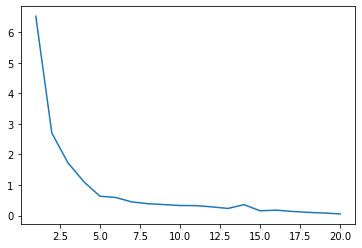

In [ ]:
threshold = 0.15
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset('unlabeled data', threshold)
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset_sponge('sponge.csv', threshold)
attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset('QCM3.csv', threshold)
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset('buddymove_holidayiq.csv', threshold)
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset('seeds_dataset.txt', threshold)
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset_hcv('hcvdat0.csv', threshold)
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset('heart_failure_clinical_records_dataset.csv', threshold)
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset('tripadvisor_review.csv', threshold)
# attribute_dictionary, max_dictionary, min_dictionary, category_values, database = load_dataset('Sales_Transactions_Dataset_Weekly.csv', threshold)

print(max_dictionary)
print(min_dictionary)
max_k = np.linspace(1, 20, num = 20)
# np.linspace(1, 10, num = 10)
X = []
Y = []
# np.zeros((k, database.shape[1]))
iterations = 3
for k in max_k:
  print("******* ",k)
  best_means = []
  best_err = sys.maxsize
  best_cluster = dict()
  # min_err = sys.maxsize
  for it in range(iterations):
    means = []
    err = 0
    clusters = dict()
    np.random.shuffle(database)
    for i in range(int(k)):
      temp = []
      for j in range(database.shape[1]):
        temp.append(database[i][j])
      means.append(temp)
    means = np.array(means)
    err, means, clusters = Kmeans(attribute_dictionary, max_dictionary, min_dictionary, database, means)
    if err < best_err:
      best_means = means
      best_err = err
      best_cluster = clusters
  
  print("means", means)
  print(k, best_err)
  X.append(k)
  Y.append(best_err)

plt.plot(X, Y)
plt.show()

In [ ]:
best_means = []
best_err = sys.maxsize
best_cluster = dict()
# min_err = sys.maxsize
k = 3
err = 0
for it in range(iterations):
  means = []
  # err = 0
  clusters = dict()
  np.random.shuffle(database)
  for i in range(int(k)):
    temp = []
    for j in range(database.shape[1]):
      temp.append(database[i][j])
    means.append(temp)
  means = np.array(means)
  temp_err, means, clusters = Kmeans(attribute_dictionary, max_dictionary, min_dictionary, database, means)
  err += temp_err

  
  # if err < best_err:
  #   best_means = means
  #   best_err = err
  #   best_cluster = clusters
  #   print(best_cluster)
  #   sillhoutte_dataset = []
  #   sillhoutte_label = []
  #   for cluster in best_cluster:
  #     for data in best_cluster[cluster]:
  #       sillhoutte_dataset.append(data)
  #       sillhoutte_label.append(cluster)

  #   sillhoutte_dataset = np.array(sillhoutte_dataset)

  #   pairwise_distance = calculate_pairwise_distance(sillhoutte_dataset, attribute_dictionary, max_dictionary, min_dictionary)

    # print(pairwise_distance)

    # silhouette_avg = silhouette_score(pairwise_distance, sillhoutte_label, metric="precomputed")
    # print("Sillhoutte score ->", silhouette_avg)
    # print("Best error ->", best_err)

print("Best error ->", err/iterations)

# sillhoutte_dataset = []
# sillhoutte_label = []
# for cluster in best_cluster:
#   for data in best_cluster[cluster]:
#     sillhoutte_dataset.append(data)
#     sillhoutte_label.append(cluster)

# sillhoutte_dataset = np.array(sillhoutte_dataset)

# pairwise_distance = calculate_pairwise_distance(sillhoutte_dataset, attribute_dictionary, max_dictionary, min_dictionary)

# print(pairwise_distance)

# silhouette_avg = silhouette_score(pairwise_distance, sillhoutte_label, metric="precomputed")
# print(silhouette_avg)

Best error -> 1.731421216992232


In [ ]:
print(best_means)

[]


In [ ]:
for ind in best_cluster:
  print(ind, len(best_cluster[ind]))
# print(best_cluster)

In [ ]:
# l = [0,1,2,'hi']
# arr = np.array(l)
# arr[0] = float(arr[0]) + 11
# print(arr)


In [ ]:
print(best_err)

9223372036854775807
